# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

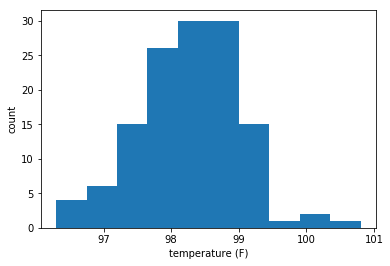

In [2]:
#Question 1: Is the distribution of body temperatures normal?
# Examine histogram
_ = plt.hist(df.temperature)
_ = plt.xlabel('temperature (F)')
_ = plt.ylabel('count')
plt.show()
# Looks near normal, with slight negative skew

In [3]:
#Formally test normality using D'Augustino & Pearson's method which tests H0 that 
#sample is taken from a normal distribution
hrnormal = st.normaltest(df.temperature, nan_policy = 'omit')
hrnormal
#Test statistic in nonsignificant indicating that the distribution is normal

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

In [4]:
#Question 2: Is the sample size large? Are the observations independent?

While I am not aware of a generic threshold for sample size within the context of the Central Limit Theorem, the sample size was sufficientfor publication in the *Journal of Statistics Education* (Shoemaker, 1996) as well as the *Journal of the American Medical Association*.  Because the observations were randomly sampled and the documentation does not suggest a clustered sampling strategy was used, I will assume the observations are independent.

In [5]:
#Question 3: Is the true population mean really 98.6 degrees F?
#Try the bootstrap hypothesis test

#Set number of observations per sample to 80% of the sample
n = int(len(df.temperature)*.8)

#Set number of samples
reps = 10000

#Create bootstrap samples
bootstrap = np.random.choice(df.temperature, (reps, n))
bootstrap_mean = bootstrap.mean(axis=0)

np.percentile(bootstrap_mean, [2.5, 97.5])
#98.6 is not within the 95% confidence interval

array([98.23692225, 98.26032975])

In [6]:
#Use a one-sample t-test because only one value has been sampled and the population value is "known."

st.ttest_1samp(df.temperature, popmean=98.6)
#The test suggests that the sample is not drawn from a population where the mean in 98.6 (p < .001)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In this situation, a t statistic is most appropriate because the population standard deviation is not known (the t distribution accounts for this uncertainty by adjusting the kurtosis of the distribution to have thicker tails).

In [12]:
#Try using the other (z) test
#Calculate z statistic and check probability with cumulative density function of the normal distribution
z = (np.mean(df.temperature)-98.6)/(np.std(df.temperature)/np.sqrt(len(df.temperature)))
print(z, st.norm.cdf(z))

(-5.475925202078116, 2.1761575829410943e-08)

In [ ]:
#How is the result be different? Why?

The t statistics produces a lower p value since it is accounting for the uncertainty due to an unknown population distribution (i.e. standard deviation).

In [9]:
#Question 4: Draw a small sample of size 10 from the data and repeat both frequentist tests.
#Select sample 
sample10 = np.random.choice(df.temperature, size=10)

In [10]:
#Conduct t test on sample
st.ttest_1samp(sample10, popmean=98.6)
#p value fails to reject the null hypothesis

Ttest_1sampResult(statistic=-0.8861566542638413, pvalue=0.3985921277419675)

In [13]:
#Conduct z test on sample
z = (np.mean(sample10)-98.6)/(np.std(sample10)/np.sqrt(len(sample10)))
print(z, st.norm.cdf(z))
#z score corresponds to the 17th percentile  
#This is well above the 2.5th percentile which corresponds to the two-tailed p value of 2.5

(-0.9340911303960331, 0.17512844339754302)

In [ ]:
#Which one is the correct one to use?
#What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

Again, the t statistic is most appropriate because the population standard deviation is not known.  However, the t statistic is preferred when samples are small.  

The p value for the t statistic is, again, more conservative than that of the z statistic.  It shows that the t statistic accounts for uncertainty from both the unknown population standard deviation and the small sample.

In [ ]:
#Question 5: At what temperature should we consider someone's temperature to be "abnormal"?

In [40]:
#Compute the 95% margin of error and confidence interval using the bootstrap approach
#Create bootstrap samples - call on reps and n from In[5]
bootstrap = np.random.choice(df.temperature, (reps, n))
bootstrap_mean = bootstrap.mean(axis=0)

#Calculate and print confidence interval and margin of error
conf_int = np.percentile(bootstrap_mean, [2.5, 97.5])
margin = np.float(np.absolute(conf_int[0]-conf_int[1])/2)
print(conf_int, margin)

[98.23576125 98.264124  ] 0.014181374999878926


In [46]:
#Compute the 95% margin of error and confidence interval using the frequentist approach
#Get mean and std for sample
mean = np.mean(df.temperature)
std = np.std(df.temperature)

#Calculate margin of error with 95% confidence interval. 
#Note: Because the sample is fairly large, the t ans z values for the 95% confidence interval should be the same.
margin = 1.96*(std/len(df.temperature))
print(margin)
lb = mean-margin
ub = mean+margin
conf_int = [lb,ub]
print(conf_int)


0.011011548051183645
[98.23821922117959, 98.26024231728196]


A person's temperature should be considered abnormal when it is above or below 98.2.

In [58]:
#Question 6:Is there a significant difference between males and females in normal temperature?
male = df.loc[df['gender']=='M']
female = df.loc[df['gender']=='F']
#Test equal variances assumption
st.levene(male.temperature,female.temperature)
#p > .05, so equal variance can be assumed
#Conduct t test with equal variances assumed
ttest=st.ttest_ind(male.temperature,female.temperature)
#Calculate observed mean differences
dif=np.mean(male.temperature)-np.mean(female.temperature)
#Print test results and difference in mean temperatures
print(ttest, dif)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561) -0.289230769230727


In [ ]:
#What testing approach did you use and why?


I used an independent samples t test.  This was appropriate because I was comparing differences in the means of a continuous variable (i.e. body temperature) between two indpendent groups (i.e. males and females).  

In [ ]:
#Write a story with your conclusion in the context of the original problem.

Based on the sample provided in this exercise, we can conclude that the average person's body temperature is not 98.6 degrees Farehnheit.  Instead, it is likely closer to 98.2.  This is supported by both single sample t tests and estimates based on bootstrapping.  Additionally, the t test described above suggests that women have, on average, slightly higher body temperatures than men.